In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'quara-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4715880%2F8007015%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240420%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240420T061734Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Da3072e438a3a32dd44c0f99f357ec0acaf5429f9186b3c98d915e8a91776cd1d8c7c9e48c1cbaba4bd59ac36ccf4e6f7650ad35ef25711ee20c6afc767fce45bf0c809bb9bd16d25330ea2d61e6755c7daf43f94cc112050461e45ff01629c1fd45f804b44f3fd41e7458dfe48eb5086ccb02cc49877c268b4da8a54a16425a73020d0edc1a16bab50482e05b6ac0f5a51287f563e86fff55211098ba9f14e33343c771dc84765d23530d6e730f3036f85fc456529c6e74cb57512f1927ee1179bb2dcdf8295c77c61156f9e0e6cb9fe2a7dc06d9ae468bc27cabb338a44189e48b797b319855acb43f6e7e24287973d96fad09c0a2587c5e9fe05a498473a21'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 22529493 bytes downloaded
Downloaded and uncompressed: quara-dataset
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/quara-dataset/train.csv


In [3]:
# kaggle datasets download -d satyamtripathis/quara-dataset

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv("/kaggle/input/quara-dataset/train.csv")

print(data.shape)

data.head()

(404290, 6)


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [6]:
data['is_duplicate'].value_counts()

is_duplicate
0    255027
1    149263
Name: count, dtype: int64

<Axes: xlabel='is_duplicate'>

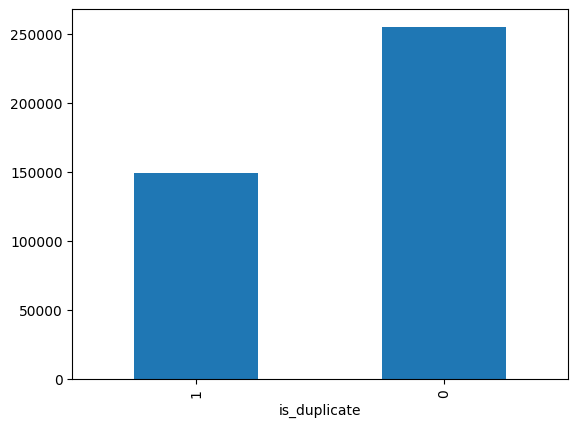

In [7]:
import matplotlib.pyplot as plt

data['is_duplicate'].value_counts().sort_values().plot(kind='bar')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [9]:
import re
from bs4 import BeautifulSoup

def preprocess(q):

    q = str(q).lower().strip()

    # removing special charecters
    q = q.replace('%','percent')
    q = q.replace('$','dollar')
    q = q.replace('₹','rupee')
    q = q.replace('€','euro')
    q = q.replace('@','at')

    # [math] comes unecesseroly
    q = q.replace('[math]','')

#     converting some no. to string equivalents

    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

#     Decontracting words, got it from internet

    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "baecause",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()


    return q


In [10]:
data['question1'] = data['question1'].apply(preprocess)
data['question2'] = data['question2'].apply(preprocess)

In [11]:
data['q1_len'] = data['question1'].str.len()
data['q2_len'] = data['question2'].str.len()

data['q1_num_words'] = data['question1'].apply(lambda row: len(row.split(" ")))
data['q2_num_words'] = data['question2'].apply(lambda row: len(row.split(" ")))

In [12]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [13]:
data['word_common'] = data.apply(common_words, axis=1)
data['word_total'] = data.apply(total_words, axis=1)

In [14]:
data['word_share'] = round(data['word_common']/data['word_total'],2)

In [17]:
# Advanced Features
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def fetch_token_features(row):

    q1 = row['question1']
    q2 = row['question2']

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
token_features = data.apply(fetch_token_features, axis=1)

data["cwc_min"]       = list(map(lambda x: x[0], token_features))
data["cwc_max"]       = list(map(lambda x: x[1], token_features))
data["csc_min"]       = list(map(lambda x: x[2], token_features))
data["csc_max"]       = list(map(lambda x: x[3], token_features))
data["ctc_min"]       = list(map(lambda x: x[4], token_features))
data["ctc_max"]       = list(map(lambda x: x[5], token_features))
data["last_word_eq"]  = list(map(lambda x: x[6], token_features))
data["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [19]:
!pip install distance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16258 sha256=933f82daefc47e0c267643e714da682025c34a2cdae449ff16e05b4ce499f731
  Stored in directory: /root/.cache/pip/wheels/e8/bb/de/f71bf63559ea9a921059a5405806f7ff6ed612a9231c4a9309
Successfully built distance


In [20]:
import distance

def fetch_length_features(row):
    q1 = row['question1']
    q2 = row['question2']

    length_features = [0.0]*3

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

#     lst=[q1[i:j] for i in range(len(q1)) for j in range(len(q1)) if q1[i:j] in q2]
#     result = max(lst, key = len)

    strs = list(distance.lcsubstrings(q1, q2))
    if strs:
        length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    else:
        length_features[2] = 0

    return length_features

In [21]:
length_features = data.apply(fetch_length_features, axis=1)

data['abs_len_diff'] = list(map(lambda x: x[0], length_features))
data['mean_len'] = list(map(lambda x: x[1], length_features))
data['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [22]:
ques1 = data['question1'].astype(str).tolist()
ques2 = data['question2'].astype(str).tolist()

In [23]:
ques2[:3]

['what is the step by step guide to invest in share market',
 'what would happen if the indian government stole the kohinoor  koh i noor  diamond back',
 'how can internet speed be increased by hacking through dns']

# Tokenization

In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [25]:
tokenizer = Tokenizer(oov_token='not available')
ques = ques1+ques2
tokenizer.fit_on_texts(ques)

In [26]:
len(tokenizer.word_counts)

86785

In [27]:
encoded_q1 = tokenizer.texts_to_sequences(ques1)
encoded_q2 = tokenizer.texts_to_sequences(ques2)

In [28]:
print(ques1[0])
encoded_q1[0]

what is the step by step guide to invest in share market in india


[3, 4, 2, 1216, 60, 1216, 2560, 8, 575, 9, 754, 380, 9, 38]

In [29]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 100
pad_q1 = pad_sequences(encoded_q1,maxlen=maxlen)
pad_q2 = pad_sequences(encoded_q2,maxlen=maxlen)

In [30]:
pad_q1[2]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    6,   14,
          5,  218,    2,  436,   11,   19,  360, 1809,  200,  145,    7,
       2765], dtype=int32)

In [31]:
ques_df1 = pd.DataFrame(pad_q1,index=data.index)
ques_df2 = pd.DataFrame(pad_q2,index=data.index)

ques_df = pd.concat([ques_df1,ques_df2],axis=1)

In [32]:
fdf = pd.concat([data,ques_df],axis=1)

In [33]:
fdf.head(1)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,90,91,92,93,94,95,96,97,98,99
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,...,2,1216,60,1216,2560,8,575,9,754,380


In [34]:
fdf = fdf.drop(['id','qid1','qid2','question1','question2'],axis=1)

fdf.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,90,91,92,93,94,95,96,97,98,99
0,0,65,56,14,12,11,23,0.48,0.999980,0.833319,...,2,1216,60,1216,2560,8,575,9,754,380
1,0,50,87,12,17,8,26,0.31,0.799984,0.399996,...,84,227,11244,2,14180,13487,5,21047,4491,202
2,0,72,58,14,10,4,24,0.17,0.399992,0.333328,...,6,14,360,436,26,3315,60,1338,220,10668
3,0,49,58,12,16,1,22,0.05,0.000000,0.000000,...,4142,41,2221,1337,370,4,2439,60,1337,2221
4,0,75,38,15,7,4,21,0.19,0.399992,0.199998,...,0,0,0,25,1925,46,1236,9,2031,229


In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(fdf.iloc[:,1:].values,fdf.iloc[:,0].values,test_size=0.2,random_state=1)

In [36]:
X_train

array([[3.8000e+01, 3.6000e+01, 7.0000e+00, ..., 1.4400e+02, 1.7200e+02,
        3.3500e+02],
       [4.5000e+01, 3.9000e+01, 9.0000e+00, ..., 8.0000e+00, 2.6000e+01,
        3.4015e+04],
       [1.1800e+02, 7.5000e+01, 2.2000e+01, ..., 2.0000e+00, 1.5900e+02,
        1.7290e+03],
       ...,
       [2.7000e+01, 3.7000e+01, 5.0000e+00, ..., 3.4100e+02, 1.1000e+01,
        5.5980e+03],
       [5.6000e+01, 6.4000e+01, 1.0000e+01, ..., 8.6200e+02, 9.0000e+00,
        3.8000e+01],
       [1.0300e+02, 1.0300e+02, 1.8000e+01, ..., 2.2200e+03, 3.2620e+04,
        1.9340e+03]])

In [37]:
import tensorflow
from keras import Sequential
from keras.layers import Dense,Embedding,LSTM,Bidirectional, BatchNormalization,Dropout

In [38]:
model = Sequential()

model.add(Embedding(len(tokenizer.word_counts),300,input_shape=(218,)))

model.add(Bidirectional(LSTM(64,dropout=0.17,recurrent_dropout=0.17)))

model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.25))

model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.30))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 218, 300)          26035500  
                                                                 
 bidirectional (Bidirection  (None, 128)               186880    
 al)                                                             
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2

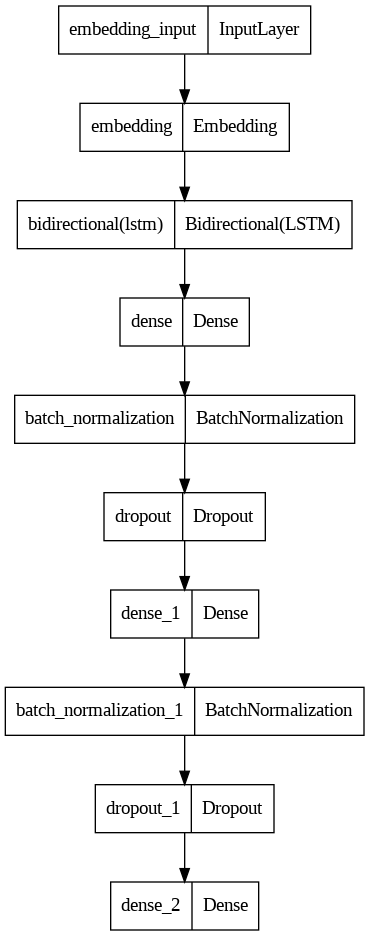

In [40]:
from keras.utils import plot_model

plot_model(model)

In [41]:
history = model.fit(X_train,y_train,epochs=10,validation_data = (X_test,y_test),batch_size=1024)

Epoch 1/10
316/316 [==============================] - 496s 2s/step - loss: 0.5268 - accuracy: 0.7289 - val_loss: 0.4994 - val_accuracy: 0.7611
Epoch 2/10
316/316 [==============================] - 454s 1s/step - loss: 0.4220 - accuracy: 0.7945 - val_loss: 0.4249 - val_accuracy: 0.7900
Epoch 3/10
316/316 [==============================] - 450s 1s/step - loss: 0.3810 - accuracy: 0.8180 - val_loss: 0.4315 - val_accuracy: 0.7950
Epoch 4/10
316/316 [==============================] - 469s 1s/step - loss: 0.3498 - accuracy: 0.8328 - val_loss: 0.4497 - val_accuracy: 0.7928
Epoch 5/10
316/316 [==============================] - 448s 1s/step - loss: 0.3232 - accuracy: 0.8459 - val_loss: 0.4708 - val_accuracy: 0.7965
Epoch 6/10
316/316 [==============================] - 446s 1s/step - loss: 0.3017 - accuracy: 0.8567 - val_loss: 0.4852 - val_accuracy: 0.7941
Epoch 7/10
316/316 [==============================] - 440s 1s/step - loss: 0.2822 - accuracy: 0.8660 - val_loss: 0.4881 - val_accuracy: 0.7960

In [42]:
from tensorflow.keras.models import save_model

model.save('modelsq1q2.h5')

In [43]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [66]:
X_test[4].reshape(1,218)

array([[5.00000000e+01, 2.60000000e+01, 1.20000000e+01, 6.00000000e+00,
        1.00000000e+00, 1.60000000e+01, 6.00000000e-02, 4.99975001e-01,
        1.66663889e-01, 0.00000000e+00, 0.00000000e+00, 1.66663889e-01,
        8.33326389e-02, 0.00000000e+00, 0.00000000e+00, 6.00000000e+00,
        9.00000000e+00, 2.59259259e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [68]:
model.predict(X_test[3].reshape(1,218))

1/1 [==============================] - 0s 238ms/step


array([[0.9647138]], dtype=float32)

In [69]:
q1 = 'i am going to market'
q2 = 'going to market'


In [70]:
from keras.models import load_model
import pickle

In [71]:
lmodel = load_model('/content/modelsq1q2.h5')
with open('/content/tokenizer.pickle','rb') as handle:
  token = pickle.load(handle)

1/1 [==============================] - 1s 508ms/step


array([[0.9647138]], dtype=float32)